In [220]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('paper', font_scale=2.0)
sns.set_style("whitegrid")
%matplotlib inline

In [171]:
df = pd.read_csv('../../thesis/references/TestAccurracy.csv', sep=';')
df.head()

,id,set,year,onset_date,y_true,pred_date,y_pred_best,error_best,error_abs_best,y_pred_latest,error_latest,error_abs_latest
0,34,test,1985,30.05.1985,1,05/29,1.24,0.2358,0.2358,-0.05,-1.0528,1.0528
1,34,test,1985,30.05.1985,2,05/28,1.56,-0.4440,0.4440,0.07,-1.9341,1.9341
2,34,test,1985,30.05.1985,3,05/27,2.07,-0.9344,0.9344,0.88,-2.1163,2.1163
3,34,test,1985,30.05.1985,4,05/26,3.14,-0.8569,0.8569,1.91,-2.0944,2.0944
4,34,test,1985,30.05.1985,5,05/25,4.26,-0.7444,0.7444,2.51,-2.4933,2.4933


In [172]:
df = df[df['set'] != 'dev'].sort_values(by='pred_date')

In [173]:
df.isna().sum()

id                  0
set                 0
year                0
onset_date          0
y_true              0
pred_date           0
y_pred_best         0
error_best          0
error_abs_best      0
y_pred_latest       0
error_latest        0
error_abs_latest    0
dtype: int64

In [174]:
y_true_means = df.groupby(['set', 'y_true']).mean().reset_index()
y_true_means.head()

,set,y_true,year,y_pred_best,error_best,error_abs_best,y_pred_latest,error_latest,error_abs_latest
0,0,1,2004.75,1.880000,0.879733,2.792658,3.492917,2.493033,3.691483
1,0,2,2004.75,2.454167,0.455279,2.896121,4.235000,2.235167,3.787892
2,0,3,2004.75,3.122500,0.122187,3.049979,5.026250,2.027312,3.838321
3,0,4,2004.75,3.964583,-0.035971,3.163346,5.937083,1.936762,3.935429
4,0,5,2004.75,4.741667,-0.257767,3.146025,6.851250,1.852158,3.996725


In [175]:
pred_date_means = df.groupby(['set', 'pred_date']).mean().reset_index()
pred_date_means.head()

,set,pred_date,year,y_true,y_pred_best,error_best,error_abs_best,y_pred_latest,error_latest,error_abs_latest
0,0,04/23,2004.0,30.0,26.876667,-3.126500,3.126500,30.436667,0.434167,0.434167
1,0,04/24,2004.0,29.0,26.426667,-2.574033,2.574033,29.393333,0.393800,0.393800
2,0,04/25,2004.0,28.0,25.953333,-2.044833,2.044833,28.983333,0.983267,0.983267
3,0,04/26,2004.0,27.0,25.483333,-1.520100,1.520100,28.390000,1.392467,1.392467
4,0,04/27,2004.0,26.0,25.343333,-0.661033,1.268900,28.563333,2.566767,2.566767


In [176]:
year_groups = df.groupby(['set', 'year']).mean().reset_index()
year_groups.head()

,set,year,y_true,y_pred_best,error_best,error_abs_best,y_pred_latest,error_latest,error_abs_latest
0,0,1985,15.5,14.001667,-1.497602,1.880647,15.362222,-0.137544,1.715529
1,0,1995,15.5,10.011333,-5.488989,5.829051,12.644333,-2.855539,4.529043
2,0,2003,15.5,9.275889,-6.224088,6.224088,12.793889,-2.705760,2.714533
3,0,2004,15.5,17.557667,2.057616,2.999349,19.138000,3.638112,3.638112
4,0,2005,15.5,8.149111,-7.351434,7.351434,9.382889,-6.116881,6.116881


In [177]:
df.groupby(['set']).mean()

,year,y_true,y_pred_best,error_best,error_abs_best,y_pred_latest,error_latest,error_abs_latest
set,,,,,,,,
0,2004.750000,15.5,13.244903,-2.255057,4.008307,16.011208,0.511286,4.025364
1,2004.750000,15.5,14.813264,-0.686854,3.894437,16.334819,0.834848,3.219193
2,2004.750000,15.5,14.109125,-1.390984,2.886893,15.985278,0.485298,2.811856
3,2004.750000,15.5,13.652736,-1.847393,3.240445,15.672333,0.172305,3.028224
test,2007.442308,15.5,15.543263,0.043174,3.579571,16.653292,1.153315,3.158636


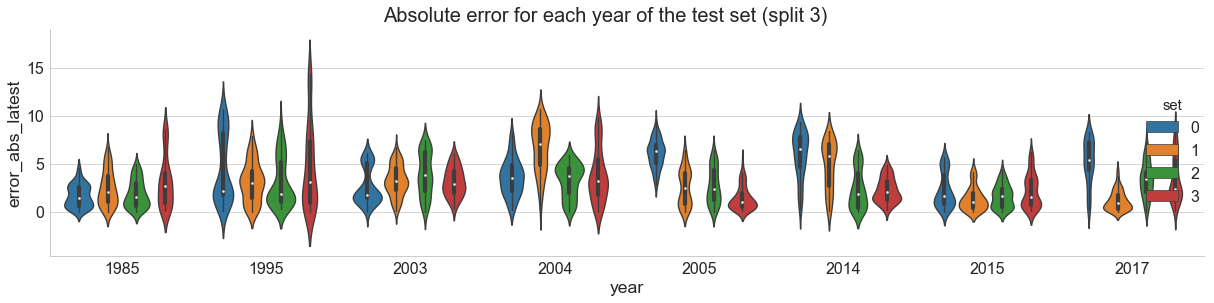

In [230]:
g = sns.factorplot(data=df[df['set'] != 'test'], x='year', y='error_abs_latest', hue='set', kind='violin', aspect=4, size=4)

ttl = g.fig.suptitle('Absolute error for each year of the test set (split 3)', size=20)
ttl.set_position([0.5, 1.04])

plt.tight_layout()
plt.savefig('prediction_years.png', bbox_inches='tight')

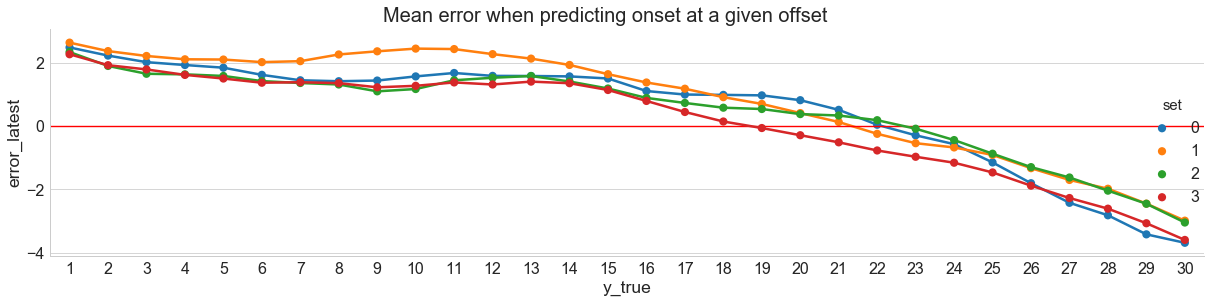

In [289]:
g = sns.factorplot(data=df[df['set'] != 'test'], x='y_true', y='error_latest', hue='set', aspect=4, size=4, ci=None)

ttl = g.fig.suptitle('Mean error when predicting onset at a given offset', size=20)
ttl.set_position([0.5, 1.04])

plt.axhline(0, c='r')

plt.tight_layout()
plt.savefig('prediction_error_offset.png', bbox_inches='tight')

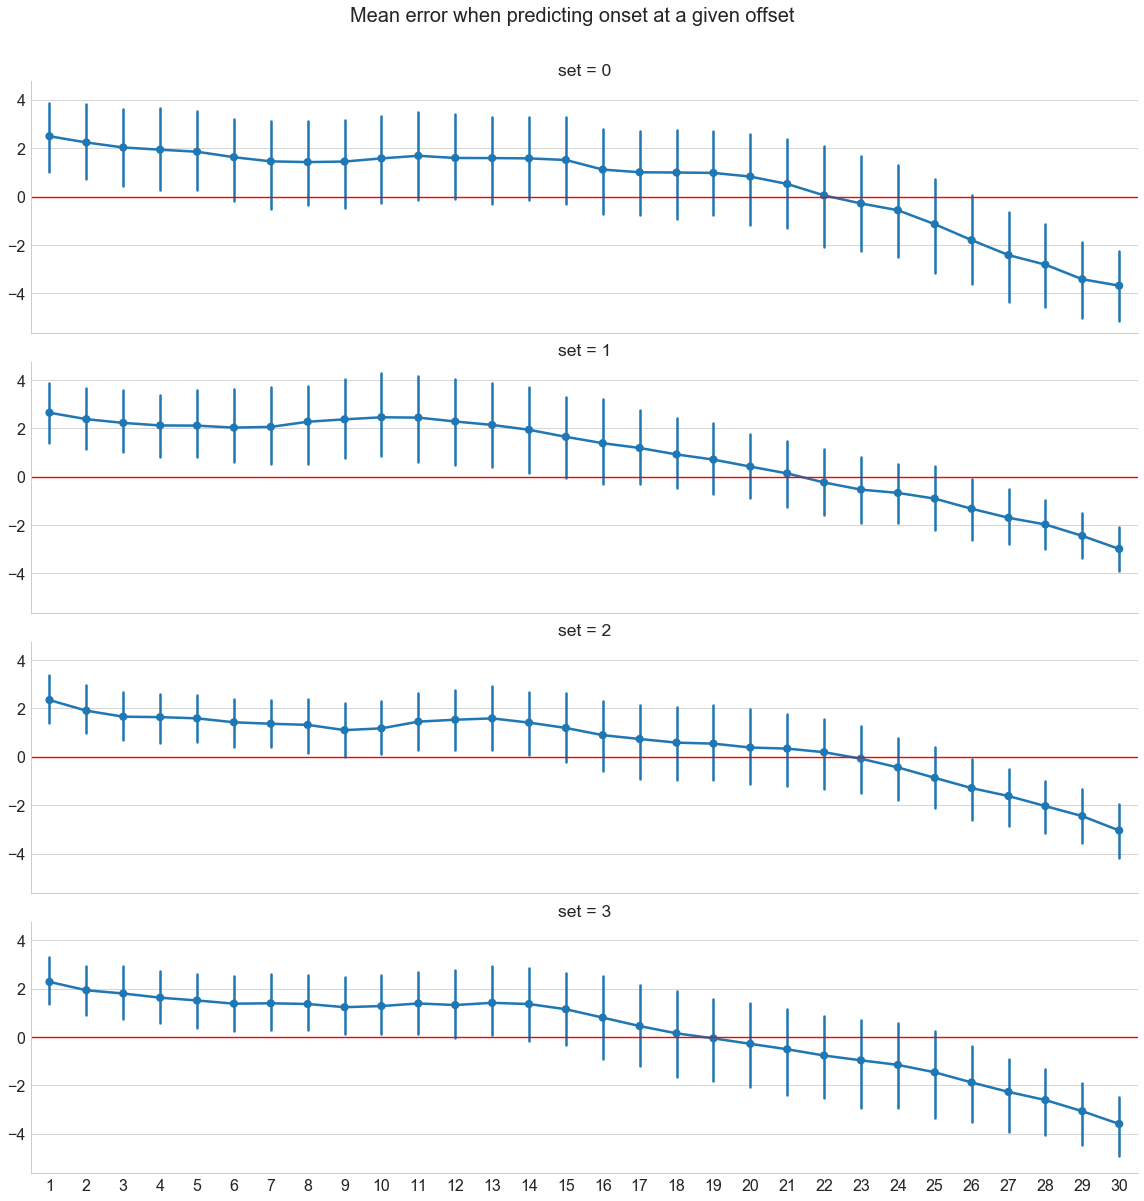

In [288]:
g = sns.factorplot(data=df[df['set'] != 'test'], x='y_true', y='error_latest', row='set', aspect=4, size=4)

ttl = g.fig.suptitle('Mean error when predicting onset at a given offset', size=20)
ttl.set_position([0.5, 1.04])

g.map(plt.axhline, y=0, c='r')

plt.tight_layout()
plt.savefig('prediction_error_offset_split.png', bbox_inches='tight')

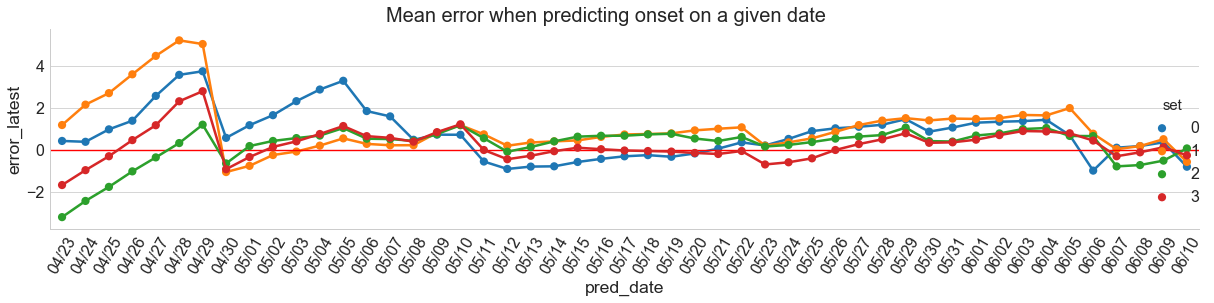

In [287]:
g = sns.factorplot(data=df[df['set'] != 'test'], x='pred_date', y='error_latest', hue='set', aspect=4, size=4, ci=None)

ttl = g.fig.suptitle('Mean error when predicting onset on a given date', size=20)
ttl.set_position([0.5, 1.04])

plt.axhline(0, c='r')
plt.xticks(rotation=60)

plt.tight_layout()
plt.savefig('prediction_error_dates.png', bbox_inches='tight')

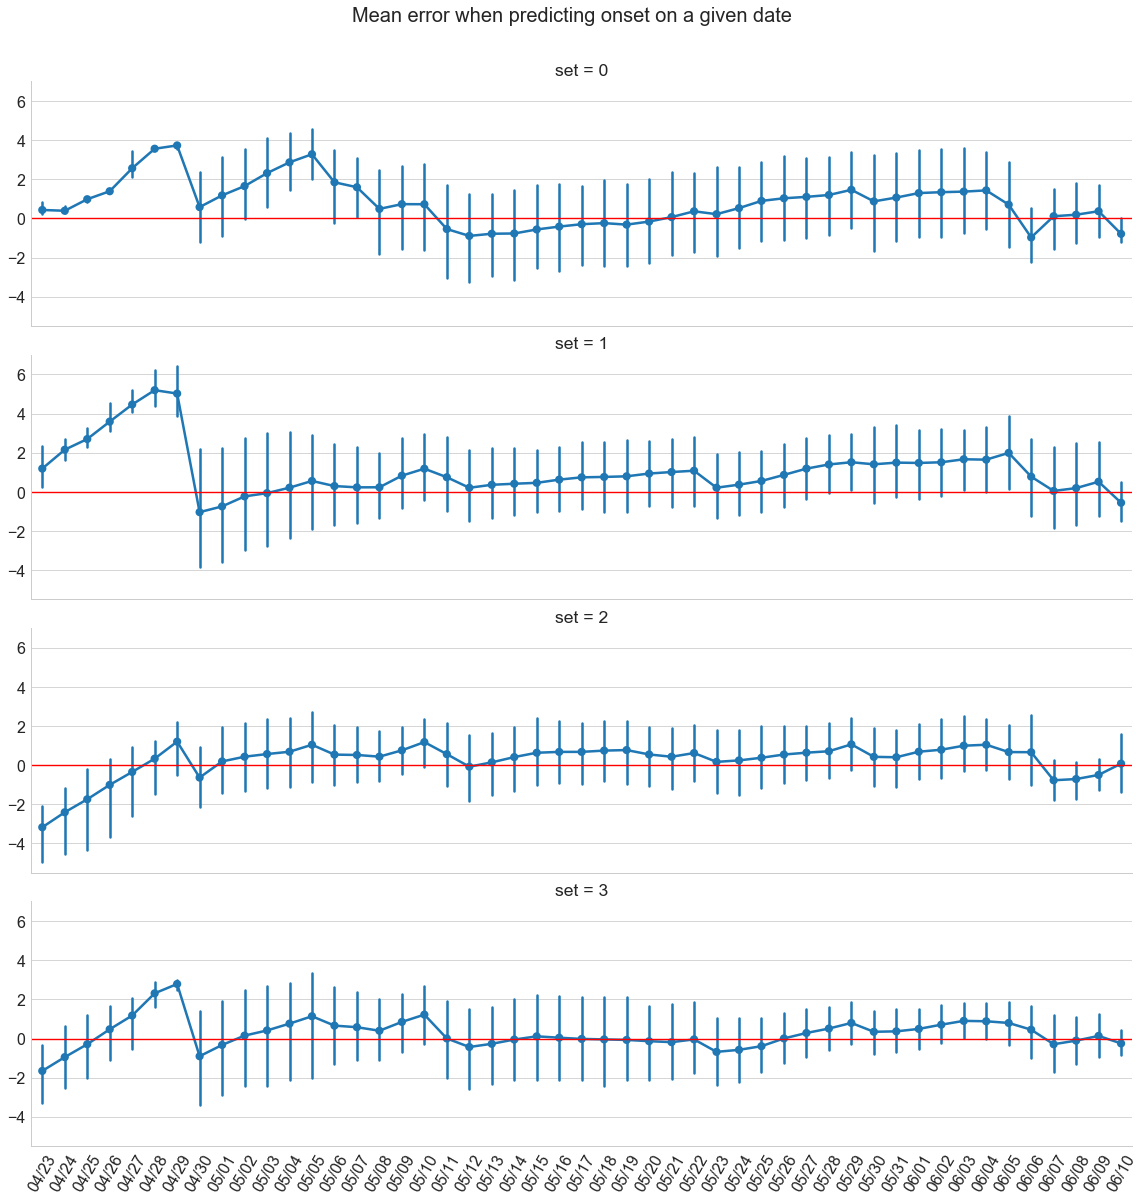

In [284]:
g = sns.factorplot(data=df[df['set'] != 'test'], x='pred_date', y='error_latest', row='set', aspect=4, size=4)

ttl = g.fig.suptitle('Mean error when predicting onset on a given date', size=20)
ttl.set_position([0.5, 1.04])

g.map(plt.axhline, y=0, c='r')

plt.xticks(rotation=60)

plt.tight_layout()
plt.savefig('prediction_error_dates.png', bbox_inches='tight')

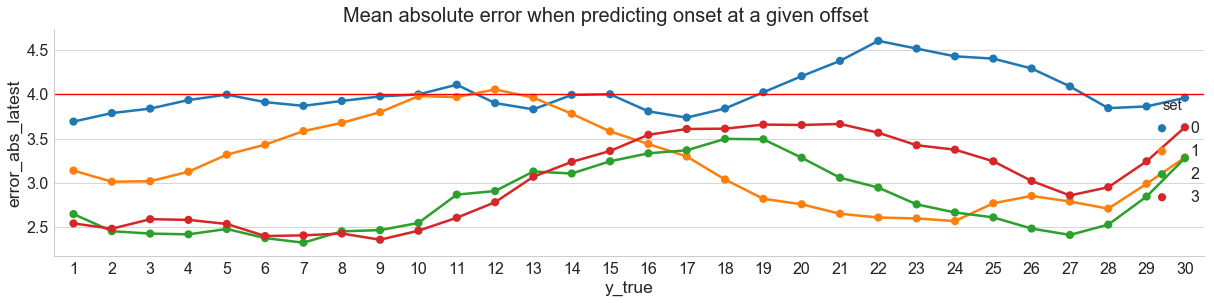

In [285]:
g = sns.factorplot(data=df[df['set'] != 'test'], x='y_true', y='error_abs_latest', hue='set', aspect=4, size=4, ci=None)

ttl = g.fig.suptitle('Mean absolute error when predicting onset at a given offset', size=20)
ttl.set_position([0.5, 1.04])

plt.axhline(4, c='r')

plt.tight_layout()
plt.savefig('prediction_accuracy_offset.png', bbox_inches='tight')

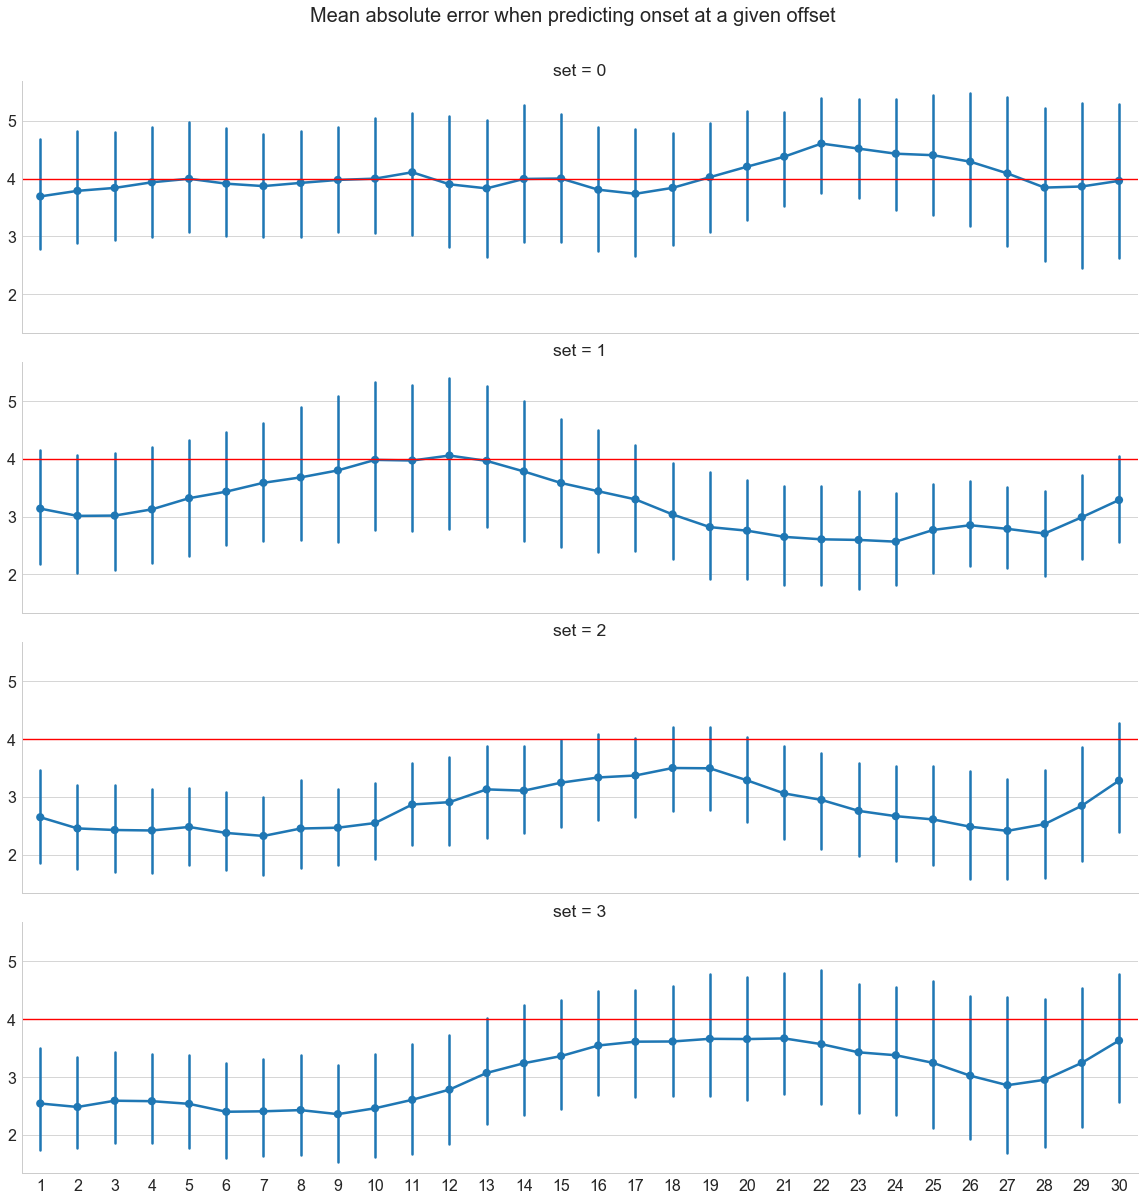

In [260]:
g = sns.factorplot(data=df[df['set'] != 'test'], x='y_true', y='error_abs_latest', row='set', aspect=4, size=4)

ttl = g.fig.suptitle('Mean absolute error when predicting onset at a given offset', size=20)
ttl.set_position([0.5, 1.04])

g.map(plt.axhline, y=4, c='r')

plt.tight_layout()
plt.savefig('prediction_accuracy_offset_split.png', bbox_inches='tight')

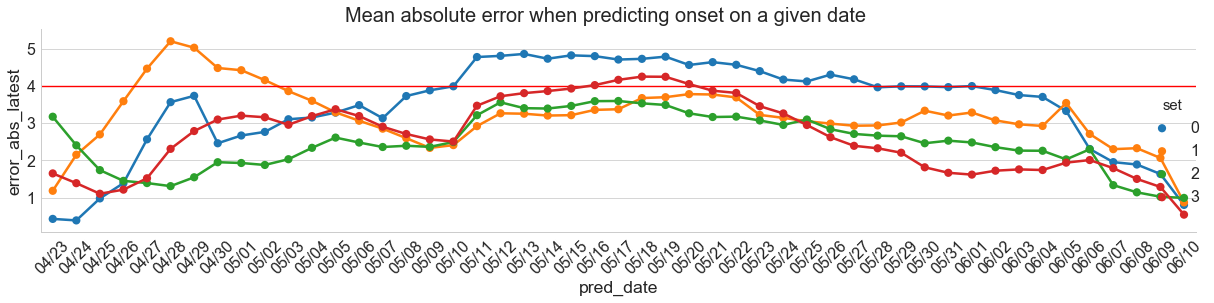

In [286]:
g = sns.factorplot(data=df[df['set'] != 'test'], x='pred_date', y='error_abs_latest', hue='set', aspect=4, size=4, ci=None)

ttl = g.fig.suptitle('Mean absolute error when predicting onset on a given date', size=20)
ttl.set_position([0.5, 1.04])

plt.axhline(4, c='r')
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('prediction_accuracy_dates.png')

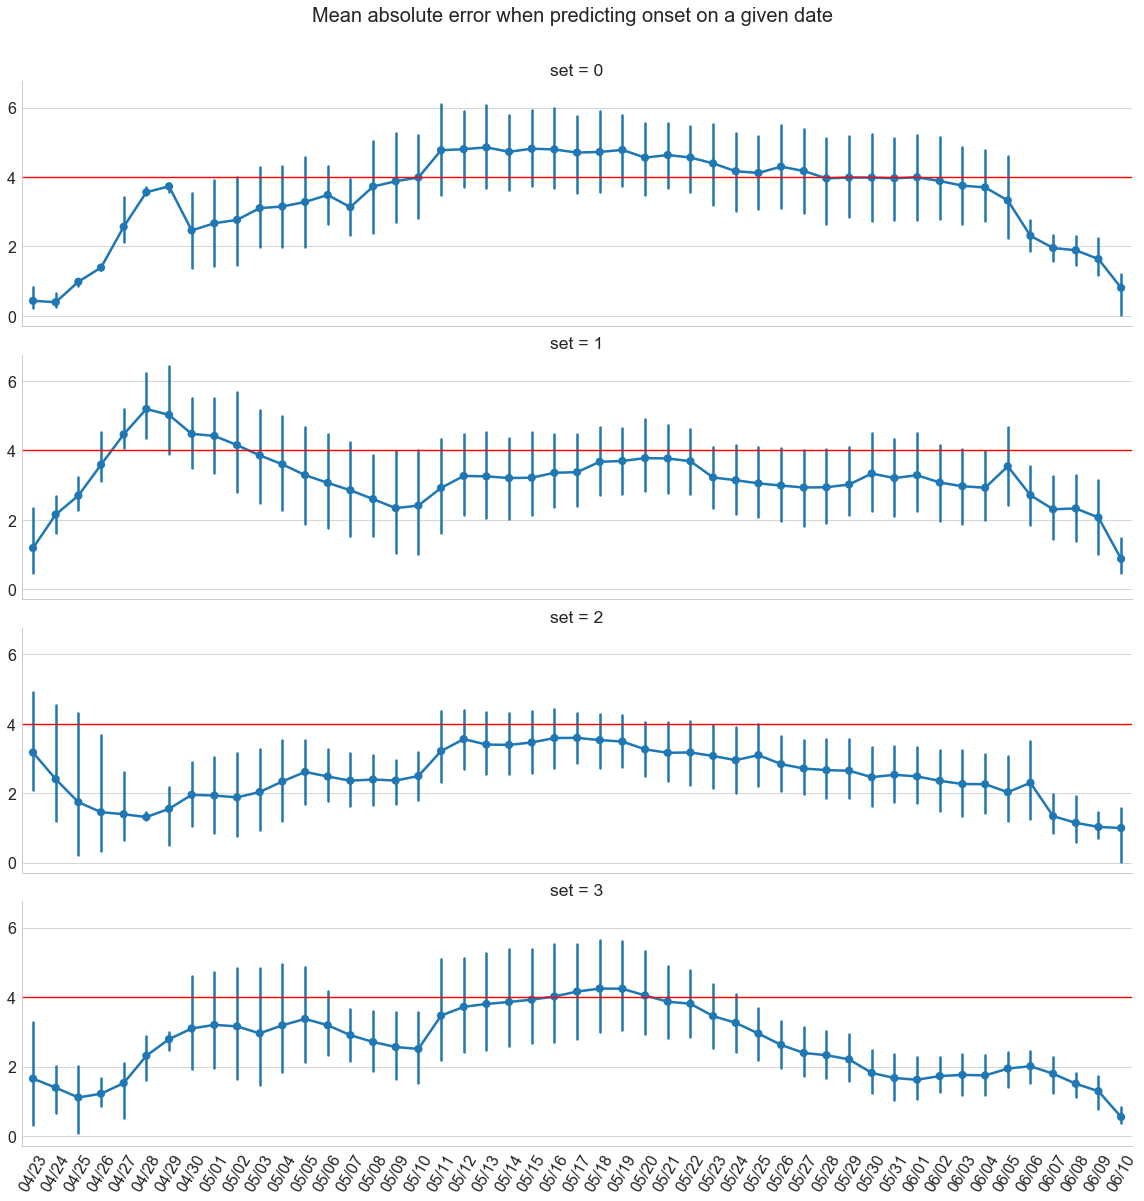

In [265]:
g = sns.factorplot(data=df[df['set'] != 'test'], x='pred_date', y='error_abs_latest', row='set', aspect=4, size=4)

ttl = g.fig.suptitle('Mean absolute error when predicting onset on a given date', size=20)
ttl.set_position([0.5, 1.04])

plt.xticks(rotation=60)
g.map(plt.axhline, y=4, c='r')

plt.tight_layout()
plt.savefig('prediction_accuracy_dates_split.png', bbox_inches='tight')